In [1]:
# Importing necessary libraries
import numpy as np             # For numerical operations
import pandas as pd            # For data manipulation and analysis
import operator                # For functional operations (e.g., itemgetter)
import os                      # For interacting with the operating system
import sys                     # For accessing system-specific parameters and functions
from sklearn import model_selection  # For splitting data into train and test sets, and other model selection utilities
import re                      # For regular expressions (pattern matching)
import string                  # For string operations

In [2]:
#This are stop_words in common taken from intenet.
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [3]:
#X is a list further made in form of tuple , where first element is name of document and second is the text in documents.
#Y is the category

#change the path of dataset as required
X  =[] 
Y = []
for category in os.listdir("Datasets"):
    for document in os.listdir("Datasets/"+category):
        with open("Datasets/"+category+'/'+document, "r") as f:
            X.append((document,f.read()))
            Y.append(category)

In [4]:
print(type(X))
print(type(X[0]))
print(type(X[0][0]))
print(type(X[0][1]))
print(type(Y))

<class 'list'>
<class 'tuple'>
<class 'str'>
<class 'str'>
<class 'list'>


In [5]:
#splitting the data in training and testing
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y)

In [6]:
#split has done in nearly 3:1 ratio
print(len(x_train))
print(len(x_test))
x_train

14997
5000


[('15412',
  'Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!noc.near.net!howland.reston.ans.net!bogus.sura.net!udel!news.intercon.com!usenet\nFrom: amanda@intercon.com (Amanda Walker)\nNewsgroups: sci.crypt\nSubject: Re: text of White House announcement and Q&As on clipper chip \n\tencryption\nDate: Mon, 19 Apr 1993 11:45:38 -0500\nOrganization: InterCon Systems Corporation - Herndon, VA  USA\nLines: 12\nDistribution: world\nMessage-ID: <1quheo$ek4@news.intercon.com>\nReferences: <1993Apr19.130132.12650@afterlife.ncsc.mil>\nReply-To: amanda@intercon.com (Amanda Walker)\nNNTP-Posting-Host: chaos.intercon.com\nX-Newsreader: InterCon TCP/Connect II 1.1\n\nrlward1@afterlife.ncsc.mil (Robert Ward) writes:\n> It refers to the right of the people to organize a militia, not for \n> individuals to carry handguns, grenades, and assault rifles.  \n\nFalse, as federal courts have affirmed on many occasions.  This is getting \nout of sci.crypt territory, though...\n\n\nAmanda Walker\nInterCo

In [7]:
#Making Dictionary of words with their corresponding frequency
dic={}
for i in range(len(x_train)):
    #Took [1] because [0] is name of doc and [1] is text in doc
    word=x_train[i][1].lower()
    #splitting the text into words
    stripped=re.split(r'\W+',word)
    #Iterating over each word
    for s in stripped:
        #we will not include stop_words, alpha-numerics, punctuations or irrelevant word of length less than 2 in our dictionary
        if not(s.isalpha()) or s in stop_word or len(s)<=2:
            continue
        if s in dic:
            dic[s]+=1
        else:
            dic[s]=1
dic

{'path': 15313,
 'cantaloupe': 19519,
 'srv': 24245,
 'cmu': 39346,
 'edu': 122963,
 'das': 4477,
 'news': 25723,
 'harvard': 5112,
 'noc': 4578,
 'near': 5117,
 'net': 19007,
 'howland': 8168,
 'reston': 8121,
 'ans': 8235,
 'bogus': 1062,
 'sura': 2797,
 'udel': 3326,
 'intercon': 386,
 'com': 37264,
 'usenet': 6289,
 'amanda': 112,
 'walker': 204,
 'newsgroups': 15321,
 'sci': 6624,
 'crypt': 1258,
 'subject': 16220,
 'text': 832,
 'white': 912,
 'house': 964,
 'announcement': 203,
 'clipper': 1054,
 'chip': 1247,
 'encryption': 853,
 'date': 15585,
 'mon': 1483,
 'apr': 15396,
 'organization': 14897,
 'systems': 1592,
 'corporation': 636,
 'herndon': 22,
 'usa': 2617,
 'lines': 15672,
 'distribution': 3597,
 'world': 3986,
 'message': 16482,
 'references': 9765,
 'afterlife': 74,
 'ncsc': 72,
 'mil': 923,
 'reply': 3251,
 'nntp': 7003,
 'posting': 7313,
 'host': 6672,
 'chaos': 92,
 'newsreader': 833,
 'tcp': 212,
 'connect': 221,
 'robert': 975,
 'ward': 96,
 'writes': 10979,
 're

In [8]:
#Sorting the dictionary on basis of frequency of words in descending order
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)
sorted_dic

[('edu', 122963),
 ('cmu', 39346),
 ('com', 37264),
 ('news', 25723),
 ('not', 25324),
 ('srv', 24245),
 ('cantaloupe', 19519),
 ('net', 19007),
 ('message', 16482),
 ('subject', 16220),
 ('lines', 15672),
 ('date', 15585),
 ('apr', 15396),
 ('can', 15388),
 ('newsgroups', 15321),
 ('path', 15313),
 ('organization', 14897),
 ('state', 14166),
 ('gmt', 13368),
 ('one', 11998),
 ('ohio', 11916),
 ('will', 11591),
 ('writes', 10979),
 ('article', 10047),
 ('comp', 9898),
 ('references', 9765),
 ('talk', 9172),
 ('misc', 9021),
 ('sender', 8303),
 ('ans', 8235),
 ('howland', 8168),
 ('reston', 8121),
 ('don', 8051),
 ('people', 7849),
 ('like', 7842),
 ('just', 7555),
 ('university', 7520),
 ('posting', 7313),
 ('nntp', 7003),
 ('know', 6959),
 ('mps', 6939),
 ('host', 6672),
 ('sci', 6624),
 ('get', 6580),
 ('usenet', 6289),
 ('think', 6276),
 ('zaphod', 6250),
 ('may', 6160),
 ('windows', 5906),
 ('alt', 5889),
 ('also', 5849),
 ('politics', 5749),
 ('use', 5388),
 ('time', 5348),
 ('rut

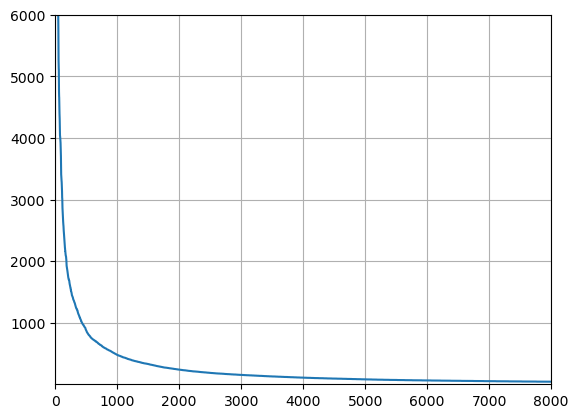

In [9]:
import matplotlib.pyplot as plt
#Plotting graph on no. of words vs frequency 
#On basis of graph we can decide the number of features we want to take
features=sorted_dic
answer1=[]
answer2=[]
for i in range(len(features)):
    answer1.append(i)
    answer2.append(features[i][1])
plt.plot(answer1,answer2)
plt.axis([0,8000,1,6000])
plt.grid()
plt.show()

In [10]:
#We decided to take top 2000 words with max freuqency as our feature
#here feature list is answer1
answer1=[features[i][0] for i in range(2000)]
answer1

['edu',
 'cmu',
 'com',
 'news',
 'not',
 'srv',
 'cantaloupe',
 'net',
 'message',
 'subject',
 'lines',
 'date',
 'apr',
 'can',
 'newsgroups',
 'path',
 'organization',
 'state',
 'gmt',
 'one',
 'ohio',
 'will',
 'writes',
 'article',
 'comp',
 'references',
 'talk',
 'misc',
 'sender',
 'ans',
 'howland',
 'reston',
 'don',
 'people',
 'like',
 'just',
 'university',
 'posting',
 'nntp',
 'know',
 'mps',
 'host',
 'sci',
 'get',
 'usenet',
 'think',
 'zaphod',
 'may',
 'windows',
 'alt',
 'also',
 'politics',
 'use',
 'time',
 'rutgers',
 'eng',
 'near',
 'new',
 'harvard',
 'rec',
 'system',
 'good',
 'crabapple',
 'well',
 'sei',
 'noc',
 'xref',
 'das',
 'soc',
 'max',
 'even',
 'now',
 'cis',
 'see',
 'europa',
 'religion',
 'gtefsd',
 'two',
 'way',
 'org',
 'uunet',
 'ece',
 'world',
 'say',
 'make',
 'god',
 'many',
 'much',
 'christian',
 'first',
 'gov',
 'rochester',
 'right',
 'distribution',
 'club',
 'space',
 'want',
 'andrew',
 'mail',
 'gatech',
 'udel',
 'said',
 

In [11]:
#Making x_train dataset
#No. of rows is equivalent to rows in x_train, and column is equal to length of answer1(feature list)
x_train_dataset=np.zeros([len(x_train),len(answer1)],int)
for i in range(len(x_train)):
    words=x_train[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_train_dataset[i][answer1.index(j)]+=1

In [12]:
#Making x_test dataset
#No. of rows is equivalent to rows in x_test, and column is equal to length of answer1(feature list)
x_test_dataset=np.zeros([len(x_test),len(answer1)],int)
for i in range(len(x_test)):
    words=x_test[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_test_dataset[i][answer1.index(j)]+=1

In [13]:
#printing x_train and x_test dataset 
print(x_train_dataset)
print("--------------------------")
print(x_test_dataset)

[[ 2  1  5 ...  0  0  0]
 [ 7  1  3 ...  0  0  0]
 [ 6  3  1 ...  0  0  0]
 ...
 [13  4  0 ...  0  0  0]
 [10  9  1 ...  0  0  0]
 [18  3  1 ...  0  0  0]]
--------------------------
[[ 6  4  3 ...  0  0  0]
 [12  3  1 ...  0  0  0]
 [ 3  1  7 ...  0  0  0]
 ...
 [ 6  3  6 ...  0  0  0]
 [10  5  5 ...  0  0  0]
 [12  1  0 ...  0  0  0]]


In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#Demonstrating confusion-matrix and classification report
clf=MultinomialNB()
clf.fit(x_train_dataset,y_train)
y_pred=clf.predict(x_test_dataset)
print("Score on training data:",clf.score(x_train_dataset,y_train))
print("Score on testing data:",clf.score(x_test_dataset,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Score on training data: 0.8899779955991198
Score on testing data: 0.8596
[[210   0   0   0   0   0   1   1   1   1   0   0   1   0   1   1   0   0
    0  44]
 [  0 189  21  20   9   9   7   1   1   1   0   1   1   1   1   0   0   0
    0   0]
 [  0   2 177  19   2  15   6   1   0   0   0   0   0   1   2   0   0   0
    0   0]
 [  1   4   7 204  26   1   3   0   0   0   0   1   2   0   0   0   0   0
    0   0]
 [  0   3   0  26 220   0   4   0   0   0   0   0   2   0   1   0   0   0
    0   0]
 [  0  14  25   8   3 187   1   0   2   0   1   0   0   0   1   0   0   0
    0   0]
 [  0   0   1   3   2   0 233   5   0   0   0   0   5   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   1   4 215   4   0   1   0   2   0   0   0   0   0
    1   1]
 [  0   0   0   0   0   0   5   1 235   0   0   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   4   5 239  14   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   1   2  10 236   0   0   0   1   0   0   0
   

# Self Implementation of Naive Baye's

In [16]:
#Making dictionary for implementing Naive Baye's
def fit(x_train_dataset,y_train):
    count={}
    total_word=0
    y_train=np.array(y_train)
    #Total no. of document is calculated
    count["total_doc"]=len(y_train)
    classes=set(y_train)
    for i in classes:
        temp=0
        #selecting x_train corresponding to class present in y_train
        x_train_with_i=x_train_dataset[y_train==i]
        #finding length of data with category corresponding to i 
        temp2=x_train_with_i.shape[0]
        count[i]={}
        #Iterating over answer1(actual feature list)
        for feature in answer1:
            #Calculating total word in feature
            l=(x_train_with_i[:,answer1.index(feature)]).sum()
            count[i][feature]=l
            temp+=l
        #Total word in that class
        count[i]["word_in_class"]=temp
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
        
    
    return count


In [17]:
def probability(x_test,dic,classes):
    prob=np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    feature=list(dic[classes].keys())
    #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=x_test[j]
        #If frequency is 0, we will not consider it
        if xj==0:
            current_prob=0
        else:
            #Extra addition part is Laplace correction
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob
    

In [18]:
#Best_class or probable answer will be returned from here
def predict_for_single(x_test,dic):
    first_run=True
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability(x_test,dic,i)
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [19]:
def predict_(x_test,dic):
    y_pred=[]
    for x in x_test:
        y_pred.append(predict_for_single(x,dic))
    return y_pred

In [20]:
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [21]:
#This cell will take time to execute
dictionary=fit(x_train_dataset,y_train)
y_pred=predict_(x_test_dataset,dictionary)


In [22]:
dictionary

{'total_doc': 14997,
 'comp.graphics': {'edu': 5489,
  'cmu': 1908,
  'com': 1253,
  'news': 1255,
  'not': 780,
  'srv': 1204,
  'cantaloupe': 978,
  'net': 1004,
  'message': 807,
  'subject': 797,
  'lines': 819,
  'date': 769,
  'apr': 674,
  'can': 1006,
  'newsgroups': 762,
  'path': 764,
  'organization': 741,
  'state': 579,
  'gmt': 658,
  'one': 385,
  'ohio': 520,
  'will': 633,
  'writes': 293,
  'article': 323,
  'comp': 1726,
  'references': 363,
  'talk': 11,
  'misc': 100,
  'sender': 378,
  'ans': 432,
  'howland': 423,
  'reston': 428,
  'don': 308,
  'people': 124,
  'like': 328,
  'just': 253,
  'university': 499,
  'posting': 365,
  'nntp': 352,
  'know': 313,
  'mps': 326,
  'host': 351,
  'sci': 121,
  'get': 322,
  'usenet': 299,
  'think': 162,
  'zaphod': 301,
  'may': 320,
  'windows': 232,
  'alt': 375,
  'also': 421,
  'politics': 0,
  'use': 395,
  'time': 202,
  'rutgers': 11,
  'eng': 234,
  'near': 253,
  'new': 191,
  'harvard': 242,
  'rec': 40,
  'sy

In [23]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pandas as pd

In [24]:
print("Score on testing_data:",score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Score on testing_data: 0.8738
[[223   0   0   1   0   1   1   1   1   2   0   0   1   0   1   1   0   0
    1  27]
 [  0 202   7  25   9   7   4   0   0   2   0   1   3   1   1   0   0   0
    0   0]
 [  0   6 152  38   3  20   3   0   0   0   0   0   1   0   0   0   0   0
    2   0]
 [  0   3   3 215  23   0   3   0   0   0   0   1   1   0   0   0   0   0
    0   0]
 [  0   2   0  17 231   1   3   0   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  0  15  23   3   4 195   1   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   0   1   2   3   0 230   7   0   0   0   0   7   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   5 216   2   0   0   1   3   0   1   0   1   0
    0   0]
 [  0   0   0   0   0   0   5   0 237   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   3   1   3 247  10   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   1   5 244   0   0   0   0   0   0   0
    0   0]
 [  0   1   0   0   0   0   1   0  

RESULT:

We have performed text-classification both by sklearn and self implementation.

We found out that sklearn gave score of 0.85 on testing_data,whereas self implemented classifier gave 0.86 on testing data,which is very close.

